In [ ]:
#run and restart runtime
!pip install matplotlib==3.4.1
!pip install chart_studio
!pip install celluloid
!apt install ffmpeg

In [1]:
import numpy as np 
import matplotlib 
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
import pandas as pd
import chart_studio
chart_studio.tools.set_credentials_file(username='username',api_key='api_key')
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from celluloid import Camera
from IPython.display import HTML
from scipy import signal
import glob
from skimage import io


print (matplotlib.__version__)

3.4.1


In [2]:
#Initial palette
palette = sns.color_palette('bright')
legend_properties = {'weight':'bold','size':'14'}
palette


[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

##Discrete Fourier Transformation

In [ ]:
def dft(y):
    N=len(y)
    c=np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

###Test data - pitch.txt

--2021-06-18 01:18:32--  http://www-personal.umich.edu/~mejn/cp/data/pitch.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9292 (9.1K) [text/plain]
Saving to: ‘pitch.txt.1’

pitch.txt.1         100%[===================>]   9.07K  --.-KB/s    in 0.1s    

2021-06-18 01:18:32 (91.9 KB/s) - ‘pitch.txt.1’ saved [9292/9292]



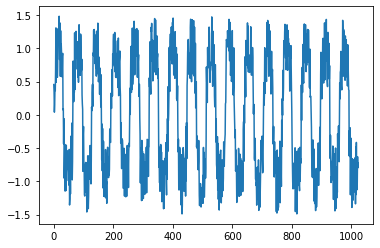

In [ ]:
!wget http://www-personal.umich.edu/~mejn/cp/data/pitch.txt
pitch = np.loadtxt('/content/pitch.txt')
plt.plot(pitch)
plt.show()

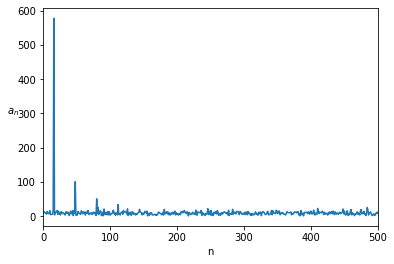

In [ ]:
c = dft(pitch)
plt.plot(abs(c))
plt.xlim(0,500)
plt.xlabel('n')
plt.ylabel('$a_n$',rotation=0)
plt.show()

### Square wave @ 5 Hz sampled at 1000 Hz /second




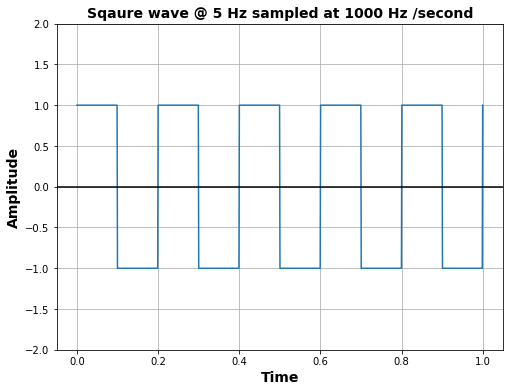

In [ ]:
fig = plt.figure(figsize=(8,6))
t = np.linspace(0, 1, 1000, endpoint=True)
square = signal.square(2 * np.pi * 5 * t)
plt.plot(t, square)
plt.title('Sqaure wave @ 5 Hz sampled at 1000 Hz /second',fontsize = 14, fontweight='bold')
# Give x axis label for the square wave plot
plt.xlabel('Time',fontsize = 14, fontweight='bold')
# Give y axis label for the square wave plot
plt.ylabel('Amplitude',fontsize = 14, fontweight='bold')
plt.grid(True, which='both')
# Provide x axis and line color
plt.axhline(y=0, color='k')
# Set the max and min values for y axis
plt.ylim(-2, 2)
# Display the square wave drawn
plt.savefig('sqaure wave original',dpi=300,bbox_inches='tight')
plt.show()


In [ ]:
square_co=dft(square)

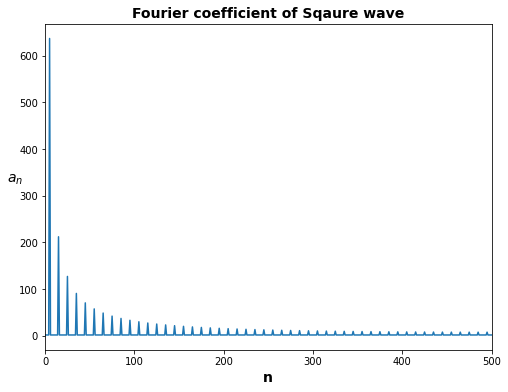

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(abs(dft(square)))
plt.xlim(0,500)
plt.xlabel('n',fontsize = 14, fontweight='bold',loc='center')
plt.ylabel('$a_n$',rotation=0,fontsize = 14, fontweight='bold',loc='center')
plt.title('Fourier coefficient of Sqaure wave',fontsize = 14, fontweight='bold')
plt.savefig('Fourier coefficient square',dpi=300,bbox_inches='tight')
plt.show()

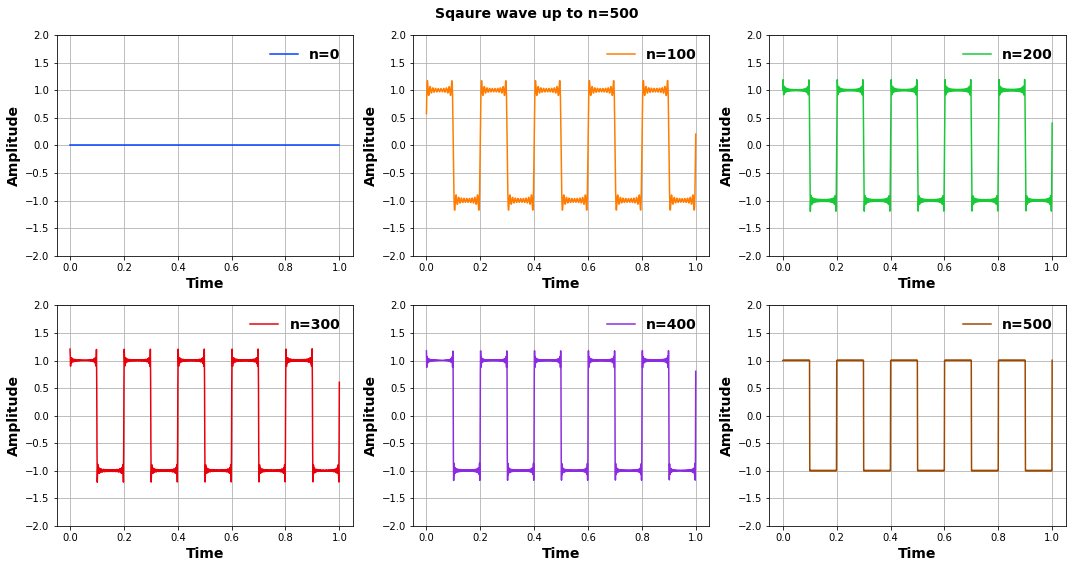

In [ ]:
fig = plt.figure(figsize=(15,8))
sqaure_ift=np.zeros(1000,complex)
n=501
counter = 0 
for i in range(0,n):
    for x in range(0,1000):
        sqaure_ift[x] += square_co[i]*np.exp(2j*np.pi*i*(x/1000))

    if counter%100 == 0:
        ax= fig.add_subplot(2,3,int(counter/100+1))
        ax.plot(np.linspace(0,1,1000),np.real(sqaure_ift)/500,label=f'n={counter}',color=palette[int(counter/100)])
        ax.set_xlabel('Time',fontsize = 14, fontweight='bold',loc='center')
        ax.set_ylabel('Amplitude',fontsize = 14, fontweight='bold',loc='center')
        ax.set_ylim(-2, 2)
        ax.grid(True, which='both')
        ax.legend(frameon=False,prop=legend_properties)
    counter += 1 


plt.suptitle(f'Sqaure wave up to n={n-1}',fontsize = 14, fontweight='bold')
# Give y axis label for the square wave plot
# Provide x axis and line color
# Set the max and min values for y axis
plt.tight_layout()
plt.savefig('sqaure wave',dpi=300,bbox_inches='tight')
plt.show()


### Sawtooth wave @ 5 Hz sampled at 1000 Hz /second




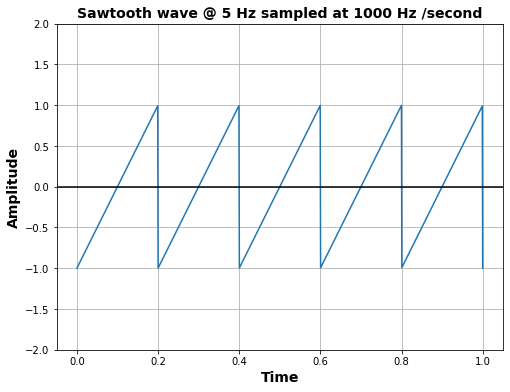

In [ ]:
fig = plt.figure(figsize=(8,6))
t = np.linspace(0, 1, 1000, endpoint=True)
sawtooth = signal.sawtooth(2 * np.pi * 5 * t)
plt.plot(t, sawtooth)
plt.title('Sawtooth wave @ 5 Hz sampled at 1000 Hz /second',fontsize = 14, fontweight='bold')
# Give x axis label for the square wave plot
plt.xlabel('Time',fontsize = 14, fontweight='bold')
# Give y axis label for the square wave plot
plt.ylabel('Amplitude',fontsize = 14, fontweight='bold')
plt.grid(True, which='both')
# Provide x axis and line color
plt.axhline(y=0, color='k')
# Set the max and min values for y axis
plt.ylim(-2, 2)
# Display the square wave drawn
plt.savefig('sawtooth wave',dpi=300,bbox_inches='tight')
plt.show()


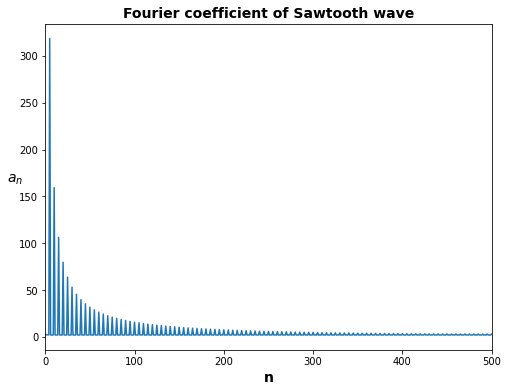

In [ ]:
fig = plt.figure(figsize=(8,6))
sawtooth_co=dft(sawtooth)
plt.plot(abs(sawtooth_co))
plt.xlim(0,500)
plt.xlabel('n',fontsize = 14, fontweight='bold')
plt.ylabel('$a_n$',rotation=0,fontsize = 14, fontweight='bold')
plt.title('Fourier coefficient of Sawtooth wave',fontsize = 14, fontweight='bold')
plt.savefig('Fourier coefficient Sawtooth',dpi=300,bbox_inches='tight')
plt.show()

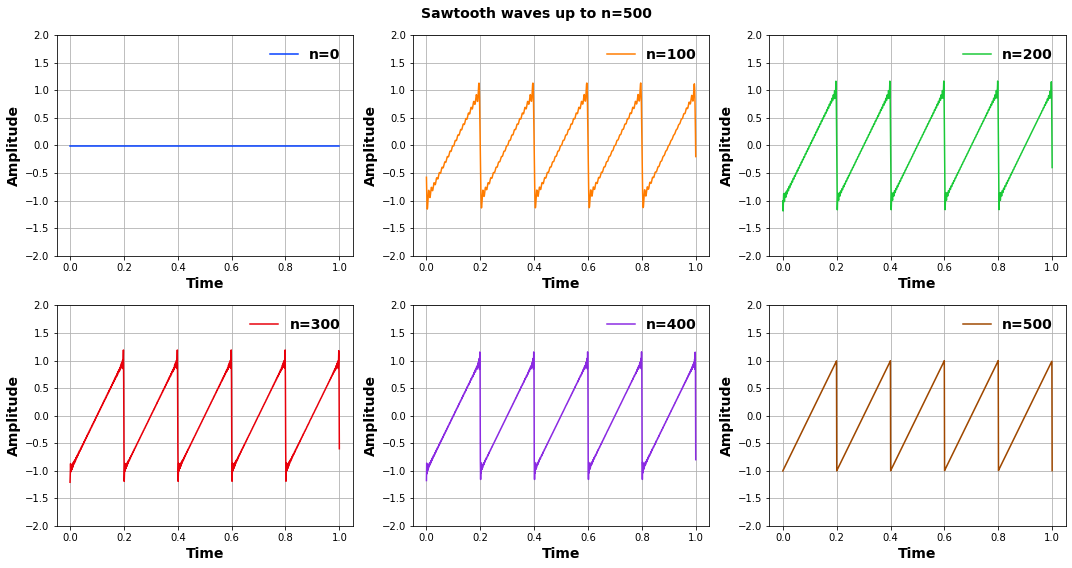

In [ ]:
fig = plt.figure(figsize=(15,8))
sawtooth_ift=np.zeros(1000,complex)
n=501
counter = 0 
for i in range(0,n):
    for x in range(0,1000):
        sawtooth_ift[x] += sawtooth_co[i]*np.exp(2j*np.pi*i*(x/1000))

    if counter%100 == 0:
        ax= fig.add_subplot(2,3,int(counter/100+1))
        ax.plot(np.linspace(0,1,1000),np.real(sawtooth_ift)/500,label=f'n={counter}',color=palette[int(counter/100)])
        ax.set_xlabel('Time',fontsize = 14, fontweight='bold')
        ax.set_ylabel('Amplitude',fontsize = 14, fontweight='bold')
        ax.set_ylim(-2, 2)
        ax.grid(True, which='both')
        ax.legend(frameon=False,prop=legend_properties)
    counter += 1 


plt.suptitle(f'Sawtooth waves up to n={n-1}',fontsize = 14, fontweight='bold')
# Give y axis label for the square wave plot
# Provide x axis and line color
# Set the max and min values for y axis
plt.tight_layout()
plt.savefig('sawtooth waves',dpi=300,bbox_inches='tight')
plt.show()


###modulated sine 

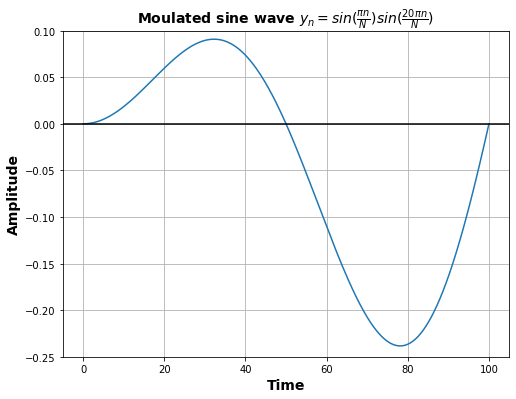

In [ ]:
fig = plt.figure(figsize=(8,6))

t = np.linspace(0, 100, 1000, endpoint=True)
mod_sin = np.sin(np.pi*t/1000) * np.sin(20*np.pi*t/1000)
plt.plot(t, mod_sin)
plt.title('Moulated sine wave $ y_n = sin(\\frac{\\pi n}{N})sin(\\frac{20\\pi n}{N}) $',fontsize = 14, fontweight='bold')
# Give x axis label for the square wave plot
plt.xlabel('Time',fontsize = 14, fontweight='bold')
# Give y axis label for the square wave plot
plt.ylabel('Amplitude',fontsize = 14, fontweight='bold')
plt.grid(True, which='both')
# Provide x axis and line color
plt.axhline(y=0, color='k')
plt.ylim(-0.25,0.1)
# Set the max and min values for y axis
# Display the square wave drawn

plt.savefig('Modulated sine wave',dpi=300,bbox_inches='tight')

plt.show()


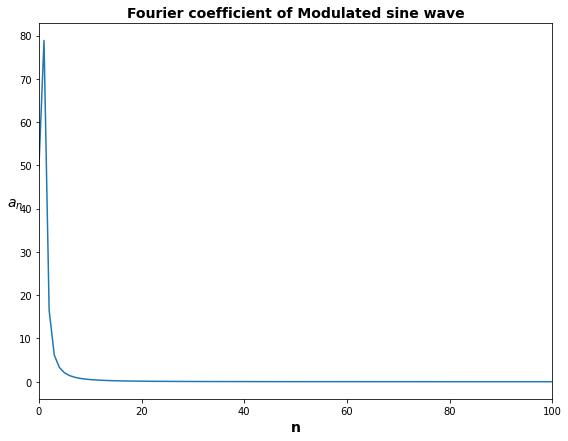

In [ ]:
fig = plt.figure(figsize=(8,6))
modsine_co=dft(mod_sin)
plt.plot(abs(modsine_co))
plt.xlim(0,100)
plt.xlabel('n',fontsize = 14, fontweight='bold')
plt.ylabel('$a_n$',rotation=0,fontsize = 14, fontweight='bold')
plt.tight_layout()
plt.title('Fourier coefficient of Modulated sine wave',fontsize = 14, fontweight='bold')
plt.savefig('Fourier coefficient Modulated sine wave',dpi=300,bbox_inches='tight')
plt.show()

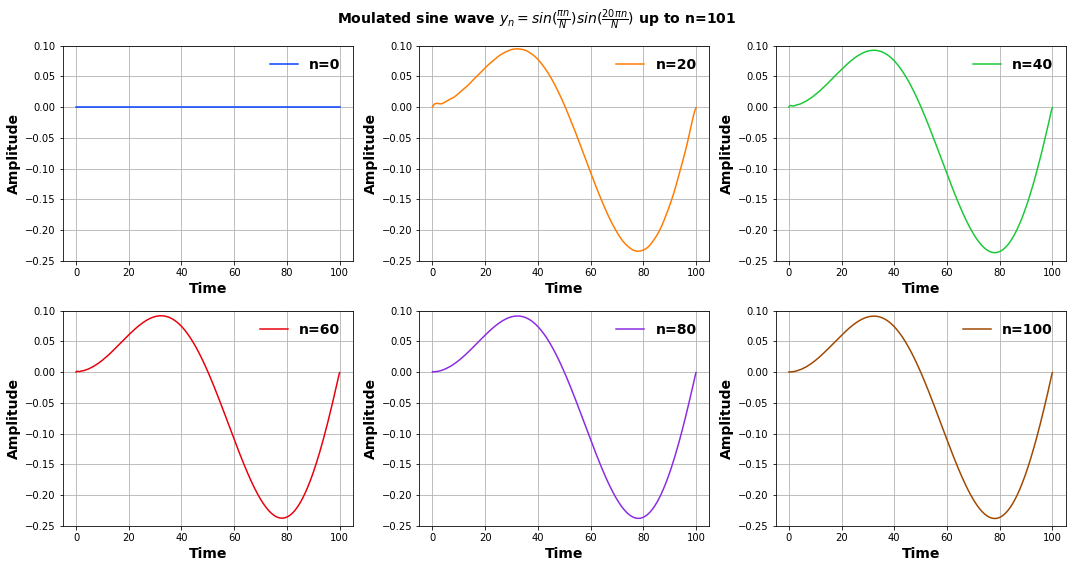

In [ ]:
fig = plt.figure(figsize=(15,8))
modsine_ift=np.zeros(1000,complex)
n=101
counter = 0 
for i in range(0,n):
    for x in range(0,1000):
        modsine_ift[x] += modsine_co[i]*np.exp(2j*np.pi*i*(x/1000))

    if counter%20== 0:
        ax= fig.add_subplot(2,3,int(counter/20+1))
        ax.plot(np.linspace(0,100,1000),(np.real(modsine_ift)+np.real(0-modsine_ift[0]))/500,label=f'n={counter}',color=palette[int(counter/20)])
        ax.set_xlabel('Time',fontsize = 14, fontweight='bold')
        ax.set_ylabel('Amplitude',fontsize = 14, fontweight='bold')
        ax.grid(True, which='both')
        ax.legend(frameon=False,prop=legend_properties)
        ax.set_ylim(-0.25,0.1)

    counter += 1 


plt.suptitle('Moulated sine wave $ y_n = sin(\\frac{\\pi n}{N})sin(\\frac{20\\pi n}{N}) $ up to n=101',fontsize = 14, fontweight='bold')
# Give y axis label for the square wave plot
# Provide x axis and line color
# Set the max and min values for y axis
plt.tight_layout()
plt.savefig('modulated waves upto 101',dpi=300,bbox_inches='tight')
plt.show()


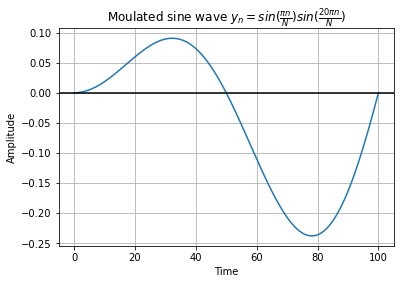

In [ ]:
t = np.linspace(0, 100, 1000, endpoint=True)
mod_sin = np.sin(np.pi*t/1000) * np.sin(20*np.pi*t/1000)
plt.plot(t, mod_sin)
plt.title('Moulated sine wave $ y_n = sin(\\frac{\\pi n}{N})sin(\\frac{20\\pi n}{N}) $')
# Give x axis label for the square wave plot
plt.xlabel('Time')
# Give y axis label for the square wave plot
plt.ylabel('Amplitude')
plt.grid(True, which='both')
# Provide x axis and line color
# Set the max and min values for y axis
# Display the square wave drawn

plt.show()


## 2D Shit

In [3]:
def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.

    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (x.max()-x.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof


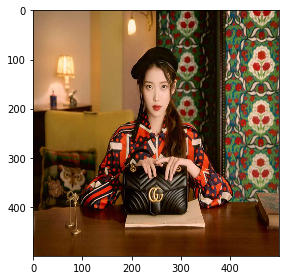

In [4]:
#image import  
our_file=glob.glob('/content/drive/MyDrive/iu.png')[0]
#showing original image
io.imshow(our_file)
plt.show()
img = io.imread(our_file, as_gray=True)

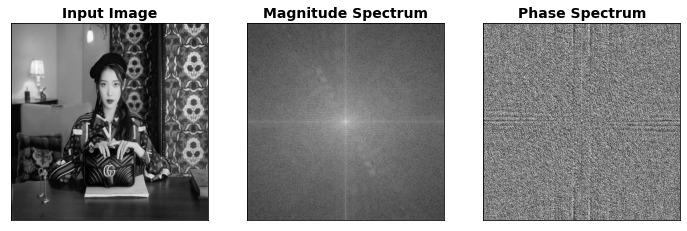

In [5]:
fig=plt.figure(figsize=(12,8))
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
phase = np.angle(fshift)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image',fontsize = 14, fontweight='bold'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize = 14, fontweight='bold'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase, cmap = 'gray')
plt.title('Phase Spectrum',fontsize = 14, fontweight='bold'), plt.xticks([]), plt.yticks([])
plt.savefig('iu',dpi=300,bbox_inches='tight')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


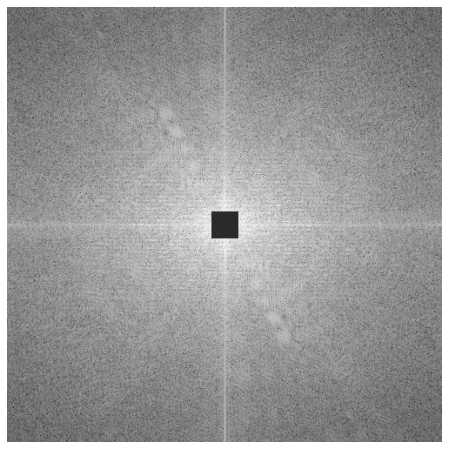

In [6]:
fig=plt.figure(figsize=(8,8))
(w, h) = fshift.shape
half_w, half_h = int(w/2), int(h/2)
# high pass filter
n = 15
fshift[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 10x10 (low) frequencies
plt.imshow( (20*np.log10( 0.1 + fshift)).astype(int),cmap='gray')
plt.axis('off')
plt.savefig('highfrequencyfilter',dpi=300,bbox_inches='tight')
plt.show()

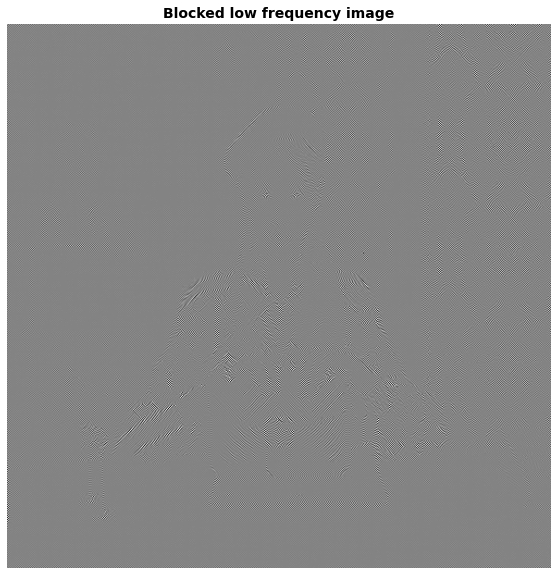

In [7]:
hiu = np.fft.ifft2(fshift).real
plt.figure(figsize=(10,10))
plt.subplot(111),plt.imshow(hiu, cmap = 'gray')
plt.title('Blocked low frequency image',fontsize = 14, fontweight='bold'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.savefig('hiu',dpi=300,bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


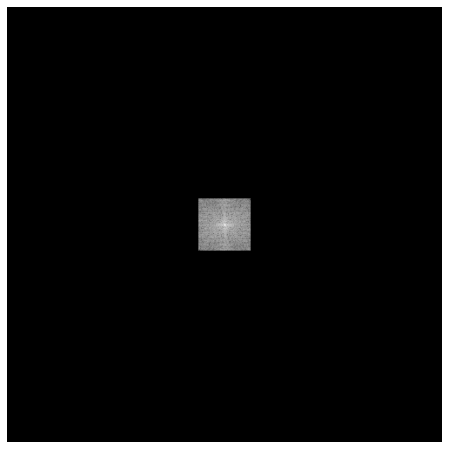

In [19]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
phase = np.angle(fshift)
fig=plt.figure(figsize=(8,8))
(w, h) = fshift.shape
# high pass filter
n = 220
fshift[0:n,:] = 0 
fshift[:,0:n] = 0 
fshift[w-n:w,:] = 0 
fshift[:,h-n:h] = 0 

plt.imshow( (20*np.log10( 0.1 + fshift)).astype(int),cmap='gray')
plt.axis('off')
plt.savefig('lowfrequencyfilter',dpi=300,bbox_inches='tight')
plt.show()

In [10]:
print (w,h)

500 500


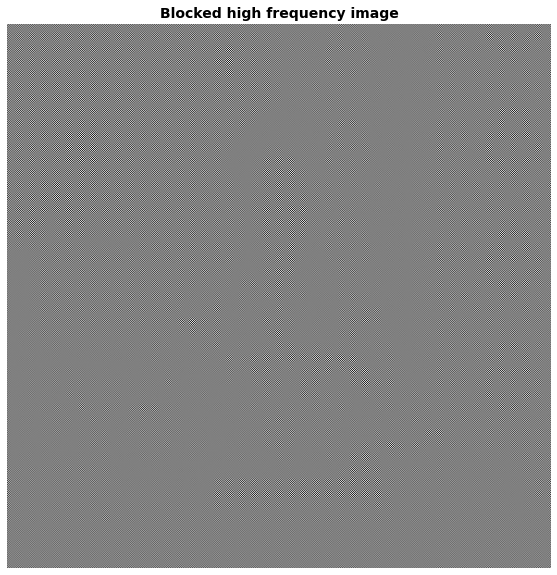

In [20]:
liu = np.fft.ifft2(fshift).real
plt.figure(figsize=(10,10))
plt.subplot(111),plt.imshow(liu, cmap = 'gray')
plt.title('Blocked high frequency image',fontsize = 14, fontweight='bold'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.savefig('liu',dpi=300,bbox_inches='tight')
plt.show()

In [22]:
psd2D = np.sqrt(np.abs(fshift)**2)
psd1D = azimuthalAverage(psd2D)

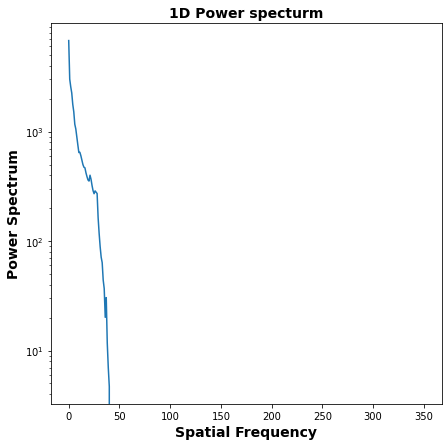

In [23]:
fig=plt.figure(figsize=(7,7))
plt.semilogy(psd1D)
plt.title('1D Power specturm',fontsize = 14, fontweight='bold')
plt.ylabel('Power Spectrum',fontsize = 14, fontweight='bold')
plt.xlabel('Spatial Frequency',fontsize = 14, fontweight='bold')
plt.savefig('1d power spectrum',dpi=300,bbox_inches='tight')

plt.show()

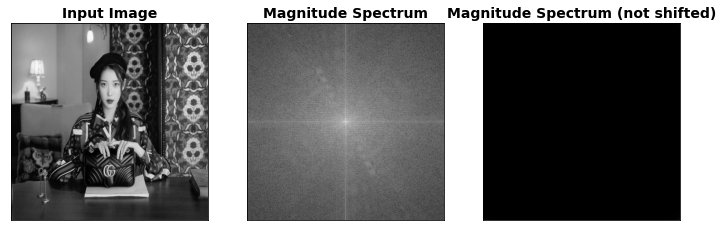

In [ ]:
fig=plt.figure(figsize=(12,8))
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
phase = np.angle(fshift)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image',fontsize = 14, fontweight='bold'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize = 14, fontweight='bold'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(abs(f), cmap = 'gray')
plt.title('Magnitude Spectrum (not shifted)',fontsize = 14, fontweight='bold'), plt.xticks([]), plt.yticks([])
plt.savefig('iu',dpi=300,bbox_inches='tight')

plt.show()

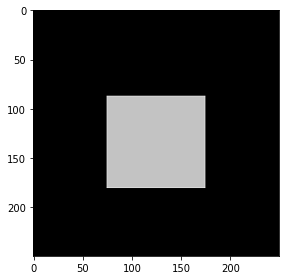

In [ ]:
#image import  
our_file=glob.glob('/content/drive/MyDrive/testimage20.png')[0]
#showing original image
io.imshow(our_file)
plt.show()
im = io.imread(our_file, as_gray=True)

In [ ]:
def dft_2D(y):
    N=y.shape[0]
    M=y.shape[1]
    c=np.zeros((N//2+1,M//2+1),complex)
    for k in range(N//2+1):
        for l in range(M//2+1):
            for n in range(N):
                for m in range(M):
                    c[k][l] += y[n][m]*np.exp(-2j*np.pi*(k*n/N+l*m/M))
    
    return c

In [ ]:
our_file=glob.glob('/content/drive/MyDrive/t4.png')[0]
im = io.imread(our_file, as_gray=True)
freq = dft_2D(im)

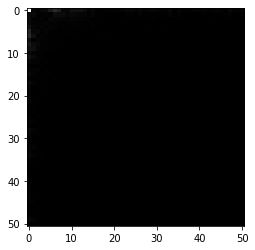

In [ ]:
plt.imshow(abs(freq),cmap='gray')
plt.show()

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

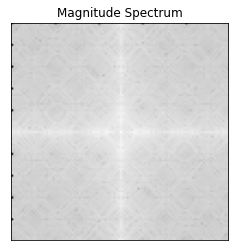

In [ ]:
fshift = np.fft.fftshift(freq)
plt.subplot(111),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

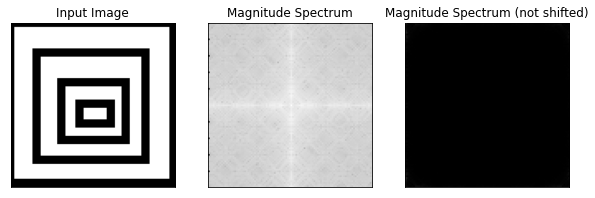

In [ ]:
our_file=glob.glob('/content/drive/MyDrive/t4.png')[0]
im = io.imread(our_file, as_gray=True)
fig=plt.figure(figsize=(10,10))
f = np.fft.fft2(im)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(131),plt.imshow(im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(abs(f), cmap = 'gray')
plt.title('Magnitude Spectrum (not shifted)'), plt.xticks([]), plt.yticks([])
plt.show()

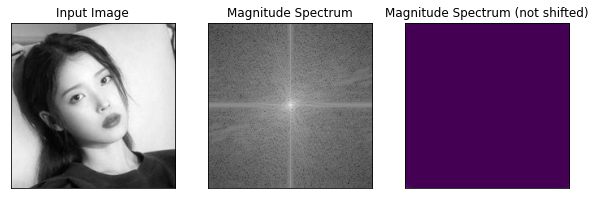

In [ ]:
our_file=glob.glob('/content/drive/MyDrive/iuface.png')[0]
im = io.imread(our_file, as_gray=True)
fig=plt.figure(figsize=(10,10))
f = np.fft.fft2(im)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(131),plt.imshow(im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(abs(f), cmap = 'gray')
plt.title('Magnitude Spectrum (not shifted)'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
im.shape[1]

500